In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
import torch
import matplotlib.pyplot as plt

from fr_models import geom, viz, gridtools
from fr_models import analytic_models as amd
from fr_models import response_models as rmd

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [61]:
period = 2*torch.pi
w_dims = [1]

W = torch.nn.Parameter(
    torch.tensor([
        [0.5,-1.2],
        [1.5,-0.6],
    ])
)
sigma = torch.nn.Parameter(
    torch.tensor([
        [[0.5,period/5], [0.4,period/4.5]],
        [[0.3,period/3.1], [0.2,period/3.5]]
    ])
)

a_model = amd.GaussianSSNModel(W, sigma, period=period, w_dims=w_dims)

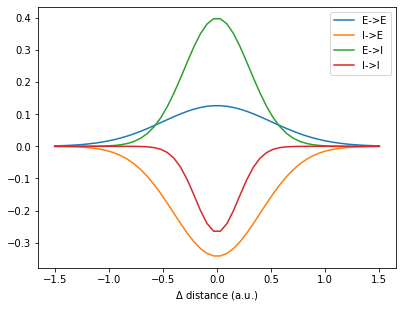

In [62]:
viz.a_model_kernel_1D(a_model, 0, unit='a.u.', labels=[['E->E','I->E'],['E->I','I->I']])
plt.show()

(<Figure size 460.8x345.6 with 1 Axes>,
 <AxesSubplot:xlabel='$\\Delta$ distance ($\\mu$m)'>,
  <matplotlib.lines.Line2D at 0x2b74362655b0>])

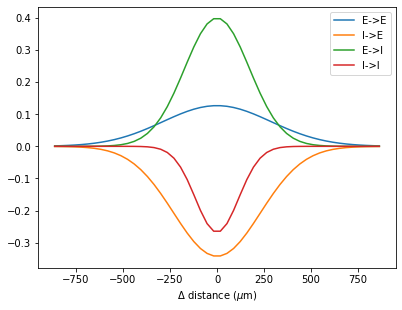

In [63]:
Ls = [2.0, period]
shape = (10,10)
length_scales = [575.0, 0.5]
r_model = rmd.SteadyStateResponse(
        a_model, 
        gridtools.Grid(Ls, shape, w_dims=w_dims, device=device).cpu(), 
        torch.tensor([0.5,0.5]), 
        torch.tensor(1.0), 
        0, 
        0,
        length_scales
)
viz.r_model_kernel_1D(r_model, 0, unit='microns', labels=[['E->E','I->E'],['E->I','I->I']])